In [1]:
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import keras

%matplotlib inline

Using TensorFlow backend.


In [2]:
data = np.load("fmri_preprocessed_2017_09_18.npy")
data = np.transpose(data)
scaler = preprocessing.StandardScaler().fit(data)
data = scaler.transform(data)
data = np.transpose(data)
data = np.expand_dims(data, axis=2)

random = np.random.permutation(np.shape(data)[0])
ratio = .70
number = int(ratio * np.shape(random)[0])
print(number)
training = data[0:number,:,:]
test = data[number:,:,:]


print('Training data shape:', np.shape(training))
print('Testing data shape:', np.shape(test))


11539
Training data shape: (11539, 300, 1)
Testing data shape: (4946, 300, 1)


/home/chris/projects/pig/env/lib/python3.5/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int16 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [ ]:
def m2():
    from keras.models import Sequential
    from keras.layers import Conv1D, MaxPooling1D, UpSampling1D
    from keras import regularizers
    
    filters = [128, 64, 32]
    kernel_size = [40, 10, 5]
    pool_size = [2, 2, 3]
    upsample_size = [4,3,2]
    weight_decay = 0.00001
    
    model = Sequential()
        ### Encoding portion
    model.add(Conv1D(filters[0],
                         kernel_size[0],
                         input_shape=(300,1),
                         activation='relu',
                         padding='same',
                         kernel_regularizer=regularizers.l2(weight_decay)))
    #model.add(BatchNormalization(axis=-1, momentum=0.99))
    model.add(MaxPooling1D(pool_size[0], padding='same'))

    model.add(Conv1D(filters[1],
                         kernel_size[1],
                         activation='relu',
                         padding='same',
                         kernel_regularizer=regularizers.l2(weight_decay)))
    #model.add(BatchNormalization(axis=-1, momentum=0.99))
    model.add(MaxPooling1D(pool_size[1], padding='same'))

    model.add(Conv1D(filters[2],
                         kernel_size[2],
                         activation='relu',
                         padding='same',
                         kernel_regularizer=regularizers.l2(weight_decay)))
    #model.add(BatchNormalization(axis=-1, momentum=0.99))
    model.add(MaxPooling1D(pool_size[2], padding='same'))



    ### Decoding portion
    model.add(Conv1D(filters[1],
                         kernel_size[1],
                         activation='relu',
                         padding='same',
                         kernel_regularizer=regularizers.l2(weight_decay)))
    #model.add(BatchNormalization(axis=-1, momentum=0.99))
    model.add(UpSampling1D(upsample_size[1]))


    model.add(Conv1D(filters[0],
                         kernel_size[0],
                         activation='relu',
                         padding='same',
                         kernel_regularizer=regularizers.l2(weight_decay)))
    #model.add(BatchNormalization(axis=-1, momentum=0.99))
    model.add(UpSampling1D(upsample_size[0]))


        # Decoded output
    model.add(Conv1D(1, 1, activation='linear', padding='same'))

    #sgd = optimizers.SGD(lr=0.001, clipvalue=0.5, momentum=.9, decay=0.0001)
    model.compile(optimizer='Adadelta', loss='mse')
   
    
    return model

auto_model = m2()
auto_model.fit(training, training, batch_size=128, epochs=25, verbose=1, shuffle=True, validation_data=(test,test))
# auto_model.save('full_pig_brandon.h5')


#sgd = optimizers.SGD(lr=0.001, clipvalue=0.5, momentum=.9, decay=0.0001)
# model.compile(optimizer='Adadelta', loss='mse')
# model.fit(training, training, batch_size=128, epochs=25, verbose=1, shuffle=True, validation_data=(test,test))



Train on 11539 samples, validate on 4946 samples
Epoch 1/25


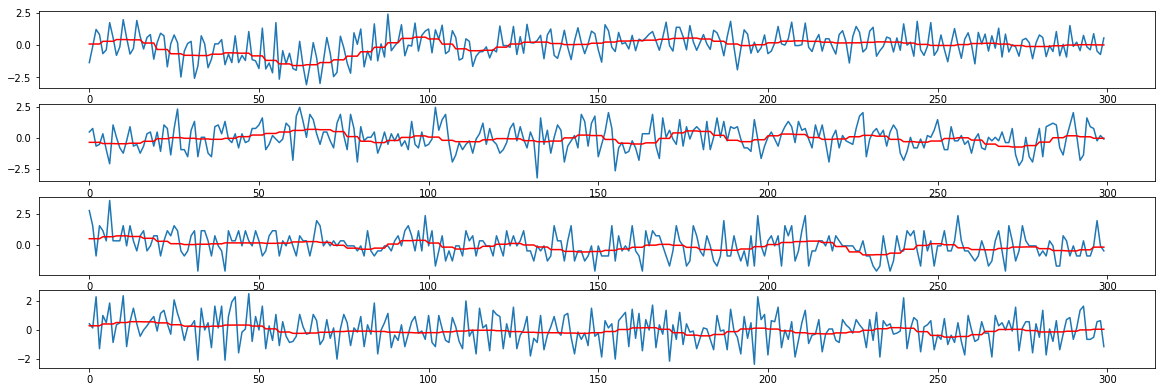

In [18]:
sample_1 = training[np.newaxis, 1000]
output_1 = auto_model.predict(sample_1)

sample_2 = training[np.newaxis, 10]
output_2 = auto_model.predict(sample_2)

sample_3 = training[np.newaxis, 66]
output_3 = auto_model.predict(sample_3)

sample_4 = training[np.newaxis, 587]
output_4 = auto_model.predict(sample_4)


plt.figure(figsize=(20, 10))
plt.subplot(611)
plt.plot(np.squeeze(sample_1))
plt.plot(np.squeeze(output_1), c='r')
plt.subplot(612)
plt.plot(np.squeeze(sample_2))
plt.plot(np.squeeze(output_2), c='r')
plt.subplot(613)
plt.plot(np.squeeze(sample_3))
plt.plot(np.squeeze(output_3), c='r')
plt.subplot(614)
plt.plot(np.squeeze(sample_4))
plt.plot(np.squeeze(output_4), c='r')

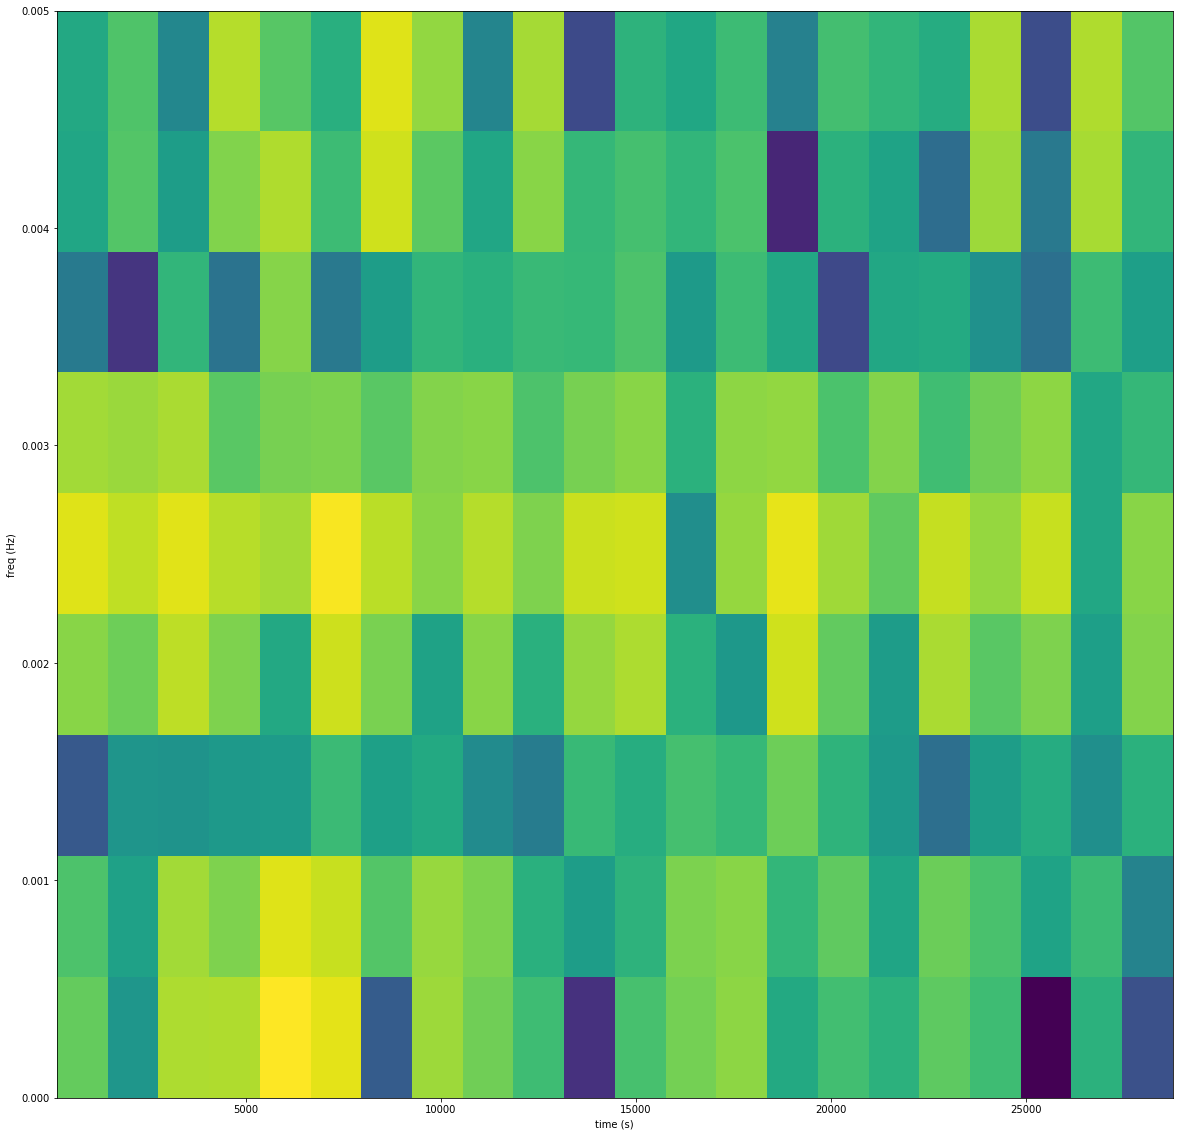

In [45]:
from scipy.signal import spectrogram

plt.figure(figsize=(20, 20))
fs = 1.0 / (15)
sample = training[1000]
# f, t, Sxx = spectrogram(np.squeeze(sample), fs)
plt.specgram(np.squeeze(sample), NFFT=16, Fs=1.0/100.0, noverlap=3)
plt.ylabel('freq (Hz)')
plt.xlabel('time (s)')
plt.show()

In [28]:
print(Sxx)

[[  2.74246701e+00]
 [  5.47624624e+02]
 [  1.18813002e+02]
 [  1.20258941e+02]
 [  1.02633614e+02]
 [  1.03762601e+01]
 [  8.32403818e+01]
 [  2.99559358e+01]
 [  2.97338611e+00]
 [  2.29380373e+01]
 [  2.98002816e+01]
 [  5.16767168e+00]
 [  2.88524675e+01]
 [  4.45253603e+00]
 [  4.77644472e+00]
 [  9.53003818e+00]
 [  6.42450628e-01]
 [  9.09300335e-01]
 [  6.58889389e-01]
 [  3.18938439e+00]
 [  4.50428479e-01]
 [  7.08311989e-01]
 [  6.82958644e-01]
 [  6.60003666e-01]
 [  3.89317180e+01]
 [  2.20956158e+00]
 [  5.99193535e+00]
 [  3.69827068e+00]
 [  5.03802281e-01]
 [  2.40149027e+00]
 [  1.03300495e+00]
 [  7.29160479e+00]
 [  4.82067856e-01]
 [  6.25711652e-01]
 [  1.76688762e+00]
 [  5.69407359e-01]
 [  1.47183631e+00]
 [  2.83154510e-01]
 [  1.33400061e+00]
 [  1.26692760e+00]
 [  1.80624762e+00]
 [  4.99658614e-01]
 [  6.57121100e+00]
 [  1.11702584e+01]
 [  4.30141468e+00]
 [  1.76579847e+01]
 [  7.04855811e-01]
 [  3.39320436e+00]
 [  3.79030256e+00]
 [  1.82554226e+01]
